In [1]:
import torch 
import matplotlib.pyplot as plt
from main import get_dataloader
from utils import get_all_amino_acids, get_wild_type_amino_acid_sequence, count_substring_mismatch
from rnn import GenerativeRNN, rnn_default_args

In [2]:
args = rnn_default_args()
args["num_data"] = 1000
args["dataset"] = "gfp_amino_acid"

In [3]:
rnn = GenerativeRNN(args)

In [9]:
# test load 
rnn.load_model("./models/rnn_test_sample_1/checkpoint_50.pt", initial_probs=True)

In [10]:
train_loader, valid_loader, test_loader = get_dataloader(args)

In [11]:
score = rnn.evaluate(test_loader)
print(score)
assert(score < 26)

25.79530859375


In [12]:
# test sample
samples = rnn.sample(1000, 238)

In [13]:
wild_type = get_wild_type_amino_acid_sequence()
mismatches = [count_substring_mismatch(sample, wild_type) for sample in samples]
print(mismatches)

[6, 3, 1, 1, 4, 4, 2, 3, 232, 4, 2, 2, 3, 3, 4, 2, 6, 4, 1, 4, 5, 1, 3, 5, 2, 4, 4, 2, 6, 3, 75, 7, 5, 3, 8, 4, 215, 4, 1, 5, 7, 187, 2, 6, 1, 219, 6, 7, 1, 219, 7, 7, 8, 4, 6, 5, 7, 3, 3, 4, 4, 4, 5, 2, 6, 4, 4, 3, 2, 5, 4, 7, 2, 0, 3, 3, 1, 214, 2, 2, 4, 3, 2, 74, 4, 8, 1, 5, 8, 10, 110, 5, 142, 193, 4, 6, 0, 3, 5, 0, 5, 4, 3, 10, 4, 4, 5, 3, 1, 175, 5, 6, 34, 5, 5, 5, 5, 8, 4, 219, 3, 63, 8, 1, 1, 3, 3, 2, 3, 40, 3, 3, 7, 77, 7, 0, 7, 3, 213, 3, 4, 6, 5, 56, 4, 1, 5, 4, 1, 1, 212, 223, 4, 4, 2, 4, 1, 3, 5, 7, 2, 94, 7, 5, 2, 4, 4, 4, 0, 2, 0, 5, 2, 2, 4, 3, 4, 1, 3, 7, 94, 3, 3, 172, 4, 3, 3, 75, 3, 7, 3, 3, 6, 5, 2, 2, 4, 2, 2, 3, 6, 3, 5, 94, 3, 5, 2, 38, 1, 1, 3, 2, 3, 5, 3, 2, 3, 1, 4, 142, 5, 4, 4, 4, 2, 2, 3, 7, 5, 227, 3, 5, 4, 4, 4, 7, 7, 4, 2, 6, 4, 5, 222, 7, 227, 2, 2, 3, 7, 3, 3, 5, 3, 218, 8, 3, 1, 4, 7, 4, 145, 4, 132, 2, 5, 3, 6, 7, 4, 2, 110, 3, 5, 0, 0, 8, 4, 3, 5, 2, 5, 4, 2, 1, 2, 0, 230, 4, 4, 178, 5, 2, 8, 1, 7, 43, 2, 3, 2, 1, 6, 1, 3, 7, 4, 6, 3, 3, 3, 1, 5, 3

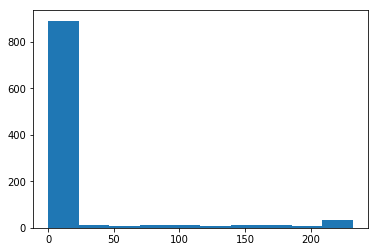

In [14]:
plt.hist(mismatches)
plt.show()

In [15]:
mismatches_20, mismatches_1000 = [sample for sample in samples if count_substring_mismatch(sample, wild_type) < 20], [sample for sample in samples if count_substring_mismatch(sample, wild_type) >= 20]

In [16]:
len(mismatches_20), len(mismatches_1000)

(886, 114)

In [21]:
mismatches_20_lst = [count_substring_mismatch(sample, wild_type) for sample in mismatches_20]

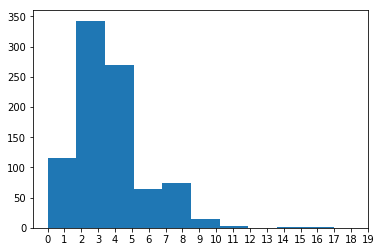

In [24]:
plt.figure()
plt.hist(mismatches_20_lst)
plt.xticks(range(0, 20, 1))
plt.show()

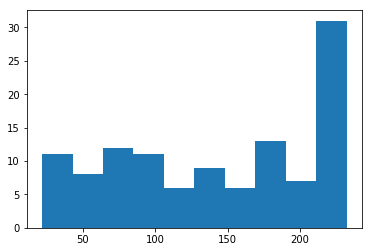

In [27]:
mismatches_1000_lst = [count_substring_mismatch(sample, wild_type) for sample in mismatches_1000]
plt.figure()
plt.hist(mismatches_1000_lst)
plt.show()

In [28]:
print(mismatches_1000[0:10])

['EWISTQGELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKPHDFFKSAMPEGYVQERTIFSKDDGNYKTRAEVKFEGDTLVNRIELKGVDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHTLSIQSALSKDPNEKRDHMVLLEFVTAAGITHGMDEL', 'SKGEALFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTILFKVDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYIYNSHNVYIMADKQKNGIKVNKFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMGELYK', 'SRGEECKTWVVTALVECDGNYKTRGEVKIEDGNVLGHKLVYNYNSHNVYIMADKLKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHLVLLEFVTAAGVTHGMDEQYK*I*I*NAKGRKLEYNYICNTNGKKVNPKILGGNVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK*FKTDI', 'SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGEPFLVKISKSGLVELDYVNHTLSEYSVSGEGDTYGRLTLKFVCTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYRTRTEVKFEGDTLVNRIELRGIDFKEDGDILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQ', 'YIMGELYKSISSKGEELSTGVVPILVELDG

In [35]:
wild_type

'SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK*'

In [36]:
mismatches_1000[7]

'SKGEELFTGVVPILVELDGDVNGRKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTPVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQRNGIKVNLKINNNIKNVKSEEGGIVAGHKLEYNYNSHNVYIMADKRKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPV'

In [54]:
sub = 'KLEYNYNSHNVYIMADK' #VYIMADKRKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPV
print(wild_type.index(sub))
k = mismatches_1000[7].index(sub)
print(k)
print(k+mismatches_1000[7][k+1:].index(sub))

138
138
183
